# Aprendizado supervisionado com Dataset

Dataset: House prices in Boston

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_ridge import KernelRidge

In [54]:
# URL do conjunto de dados
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Lendo os dados
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Processando os dados
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Nomes das colunas
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT"
]

#Preço medio das casas
target_name = "MEDV"

# Criando um DataFrame para facilitar a manipulação
boston = pd.DataFrame(data, columns=feature_names)
boston[target_name] = target

print(boston.head())

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\welli\AppData\Local\Temp\ipykernel_17664\1563095629.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [70]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


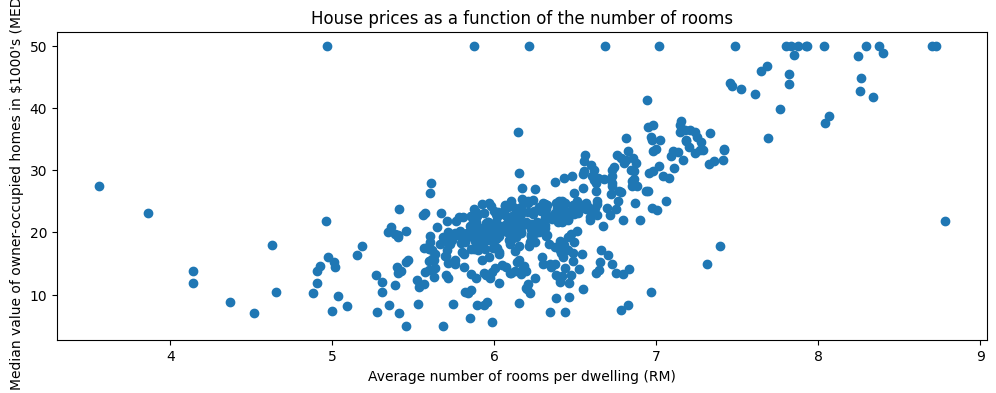

In [55]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter(boston["RM"], boston["MEDV"])

plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Median value of owner-occupied homes in $1000's (MEDV)")
plt.title("House prices as a function of the number of rooms")
plt.show()

Aplicando o algoritimo de aprendizado supervisionado

C:\Users\welli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


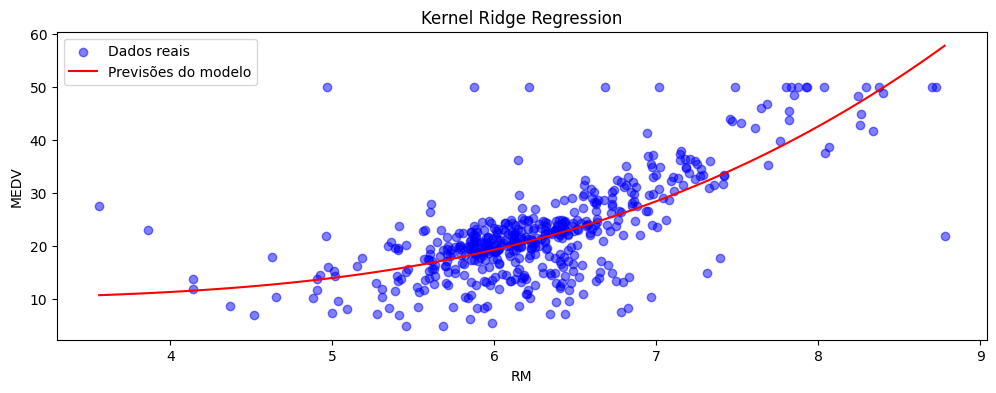

In [84]:
# Criando o modelo de Kernel Ridge Regression
model = KernelRidge(alpha=1, kernel='poly') # alpha=1 é o parâmetro de regularização, kernel='poly' usa um kernel polinomial


# Definindo as variáveis independente (X) e dependente (y)
X = boston[["RM"]] #formato 2D
y = boston["MEDV"] #formato 1D

# Treinando o modelo com os dados
model.fit(X,y) # Ajusta o modelo para aprender a relação entre RM e MEDV

X_min = X.values.min()
X_max = X.values.max()

# Gera 100 valores entre X_min e X_max e transforma em 2D
X_test = np.linspace(X_min, X_max, 100)[:, np.newaxis]

# Prevê os valores de MEDV para os valores de RM em X_test
predictions = model.predict(X_test)

#Visualiza os resultados
plt.scatter(X, y, color='blue', alpha=0.5, label='Dados reais')
plt.plot(X_test, predictions, color='red', label='Previsões do modelo')
plt.xlabel("RM") #Average number of rooms per dwelling
plt.ylabel("MEDV") #Median value of owner-occupied homes in $1000's
plt.title("Kernel Ridge Regression")
plt.legend()
plt.show()